In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns
sns.set(style = "darkgrid")

In [ ]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety','output']
cars = pd.read_csv("car_evaluation.csv", names = cols, header = None)
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


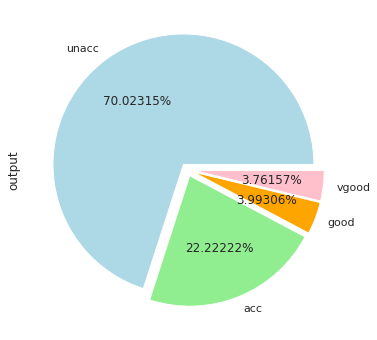

In [ ]:
plot_size = plt.rcParams["figure.figsize"]
plot_size [0] = 8
plot_size [1] = 6
plt.rcParams["figure.figsize"] = plot_size
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05,0.05,0.05,0.05))


In [ ]:
price = pd.get_dummies(cars.price, prefix = 'price')
maint = pd.get_dummies(cars.maint, prefix = 'maint')

doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix = 'persons')

lug_capacity = pd.get_dummies(cars.lug_capacity, prefix = 'lug_capacity')
safety = pd.get_dummies(cars.safety, prefix = 'safety')

labels = pd.get_dummies(cars.output, prefix = 'condition')

X = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis = 1)
y = labels.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

input_layer = Input(shape = (X.shape[1],))
dense_layer_1 = Dense(15, activation = 'relu')(input_layer)
dense_layer_2 = Dense(10, activation = 'relu')(dense_layer_1)
output = Dense(y.shape[1], activation = 'softmax')(dense_layer_2)

model = Model(inputs = input_layer, outputs = output)

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 15)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, batch_size = 8, epochs = 50, verbose = 1, validation_split=0.2  )

Epoch 1/50
139/139 [==============================] - 1s 4ms/step - loss: 0.9724 - acc: 0.6643 - val_loss: 0.8453 - val_acc: 0.6498
Epoch 2/50
139/139 [==============================] - 0s 2ms/step - loss: 0.6134 - acc: 0.7294 - val_loss: 0.6173 - val_acc: 0.7004
Epoch 3/50
139/139 [==============================] - 0s 2ms/step - loss: 0.4437 - acc: 0.8118 - val_loss: 0.4929 - val_acc: 0.7762
Epoch 4/50
139/139 [==============================] - 0s 2ms/step - loss: 0.3488 - acc: 0.8633 - val_loss: 0.4218 - val_acc: 0.8339
Epoch 5/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2986 - acc: 0.8751 - val_loss: 0.3814 - val_acc: 0.8375
Epoch 6/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2647 - acc: 0.8878 - val_loss: 0.3456 - val_acc: 0.8484
Epoch 7/50
139/139 [==============================] - 0s 2ms/step - loss: 0.2403 - acc: 0.8932 - val_loss: 0.3261 - val_acc: 0.8556
Epoch 8/50
139/139 [==============================] - 0s 2ms/step - loss: 0.

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 1)
print("Test Score : ", score[0])
print("Test Accuracy : ", score[1])

11/11 [==============================] - 0s 1ms/step - loss: 0.0752 - acc: 0.9682
Test Score :  0.07519574463367462
Test Accuracy :  0.9682080745697021


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv("iris.data", names = names)

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, 4].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
# X_train = s.transform(X_train)
# X_test = s.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print("정확도: {}".format(accuracy_score(y_test, y_pred)))

정확도: 0.8333333333333334


In [ ]:
k = 10
acc_array = np.zeros(k)
for k in np.arange(1, k+1, 1):
  classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  acc_array[k-1] = acc

max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("정확도", max_acc, "으로 최적의 k는", k+1, "입니다")

정확도 0.9333333333333333 으로 최적의 k는 1 입니다


In [ ]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [ ]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size = 0.6, random_state = 42)

In [ ]:
svm = svm.SVC(kernel = 'linear', C = 10, gamma = 0.5)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)
print("정확도: {0:f}".format(score))

정확도: 0.977778


In [ ]:
import pandas as pd
df = pd.read_csv("train.csv", index_col = "PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]]
df['Sex'] = df['Sex'].map({'male': 0, 'female' : 1})
df = df.dropna()
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,0,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,3,1,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,3,1,39.0,0,5,29.1250
887,2,0,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000


In [ ]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 714, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8156424581005587

In [ ]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns = ['Predicted Not Survival', 'Predicted Survival'],
    index = ['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,96,16
True Survival,17,50


In [ ]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()

print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


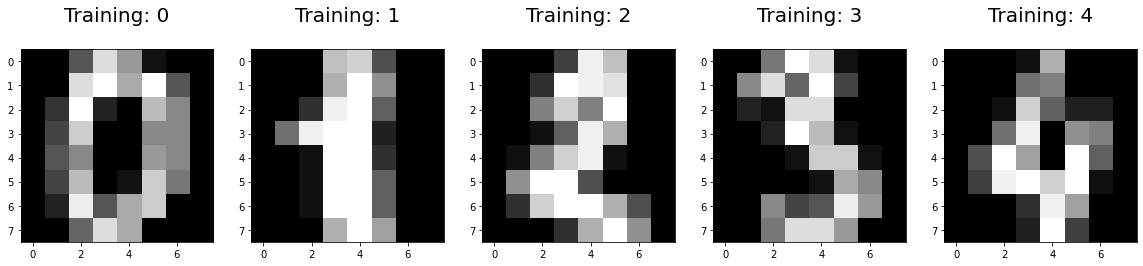

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image,(8,8)), cmap = plt.cm.gray)
  plt.title("Training: %i\n" % label, fontsize = 20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logisticRegr.predict(x_test[0].reshape(1,-1))
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [ ]:
pred = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


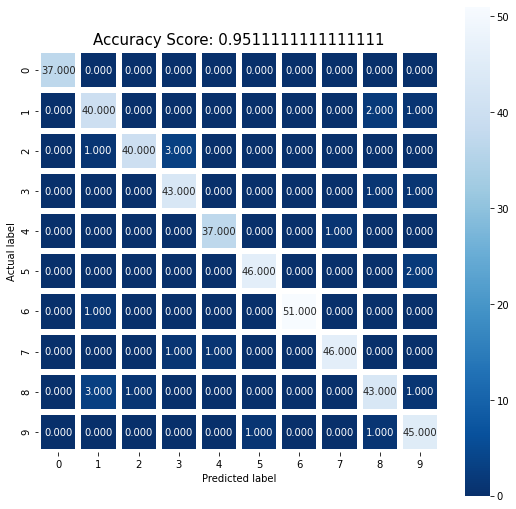

In [ ]:
import numpy as np
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, pred)
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = 5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show();


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [ ]:
dataset = pd.read_csv("weather.csv")

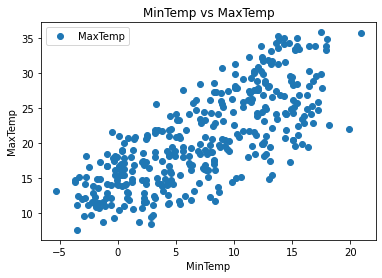

In [ ]:
dataset.plot(x = "MinTemp", y = 'MaxTemp', style = 'o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [ ]:
X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_pred.flatten()})
df

,Actual,Predicted
0,25.8,23.677534
1,12.3,12.654492
2,19.9,25.055415
3,14.7,16.185310
4,34.9,29.877996
...,...,...
69,27.8,29.533526
70,29.6,29.102938
71,14.7,11.190494
72,25.1,27.466705


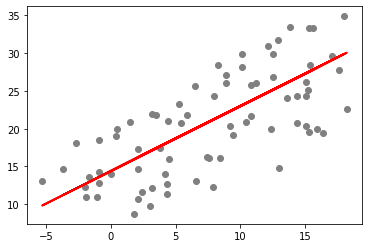

In [ ]:
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth = 2)
plt.show()

In [ ]:
print("평균제곱법: ", metrics.mean_squared_error(y_test, y_pred))
print("루트 평균제곱법: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법:  23.520842773494476
루트 평균제곱법:  4.849829148897358


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [ ]:
X = pd.read_csv("credit card.csv")
X = X.drop('CUST_ID', axis = 1)
X.fillna(method = 'ffill', inplace = True)
print(X.head())

       BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 17 columns]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268878
3 -0.481656 -0.097611
4 -0.563512 -0.482505


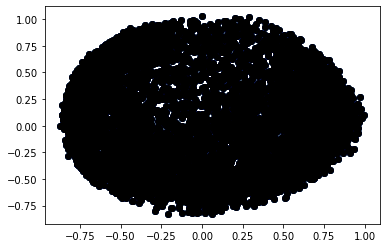

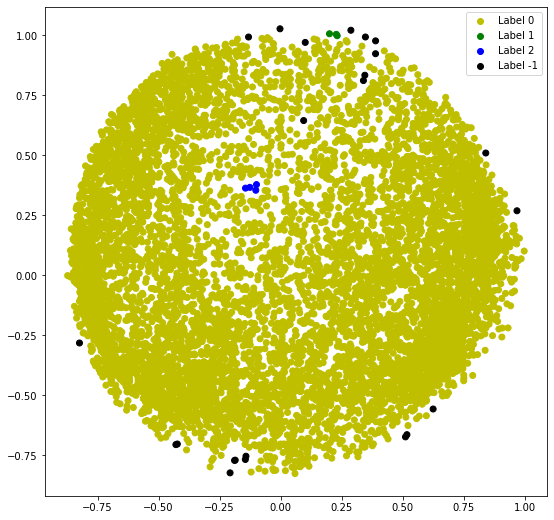

In [ ]:
db_default = DBSCAN(eps=0.0375, min_samples=3).fit(X_principal)
labels = db_default.labels_

colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k');

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)

plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

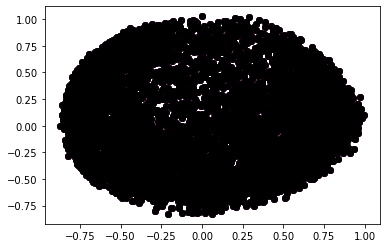

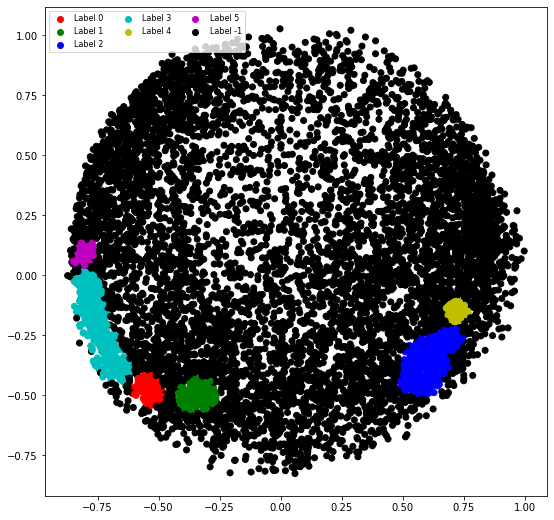

In [ ]:
db = DBSCAN(eps=0.0375, min_samples=50).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[6])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, c, y, m, k),
          ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
          scatterpoints=1,
          loc='upper left',
          ncol=3,
          fontsize=8)
plt.show()

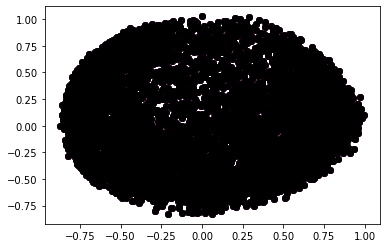

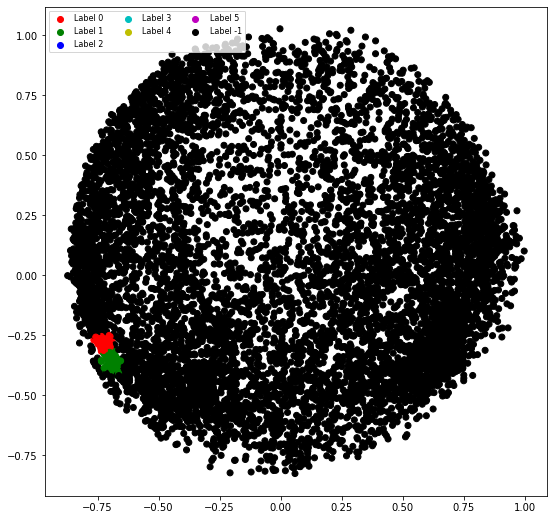

In [ ]:
db = DBSCAN(eps=0.0375, min_samples=100).fit(X_principal)
labels1 = db.labels_

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k']

r = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[0])
g = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[1])
b = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[2])
c = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[3])
y = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[4])
m = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[5])
k = plt.scatter(
    X_principal['P1'], X_principal['P2'], marker='o', color=colors1[6])

plt.figure(figsize=(9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)
plt.legend((r, g, b, c, y, m, k),
          ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'),
          scatterpoints=1,
          loc='upper left',
          ncol=3,
          fontsize=8)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("sales data.csv")

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in categorical_features:
  dummies = pd.get_dummies(data[col], prefix = col)
  data = pd.concat([data, dummies], axis = 1)
  data.drop(col, axis = 1, inplace = True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [ ]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

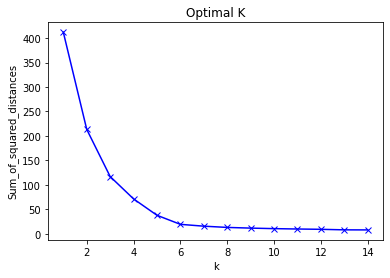

In [ ]:
Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(data_transformed)
  Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal K')
plt.show()

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


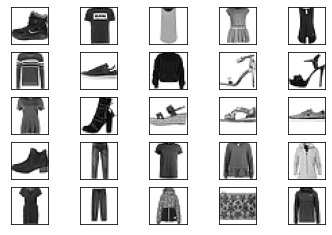

In [4]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', "Sandal", 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)

plt.show()

In [10]:
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose = 2)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3025 - accuracy: 0.1037
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2996 - accuracy: 0.1204
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2853 - accuracy: 0.1893
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2504 - accuracy: 0.2309
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1970 - accuracy: 0.2632
313/313 - 0s - loss: 2.1635 - accuracy: 0.2881


[2.163498878479004, 0.288100004196167]

In [12]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [13]:
def print_image_summary(image, labels):

    print('--------------')
    print('Image Details:')
    print('--------------')
    print(f'Image dimensions: {image.shape}')
    print('Channels:')

    if len(labels) == 1:
        image = image[..., np.newaxis]

    for i, lab in enumerate(labels):
        min_val = np.min(image[:,:,i])
        max_val = np.max(image[:,:,i])
        print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

In [14]:
pip install scikit_image

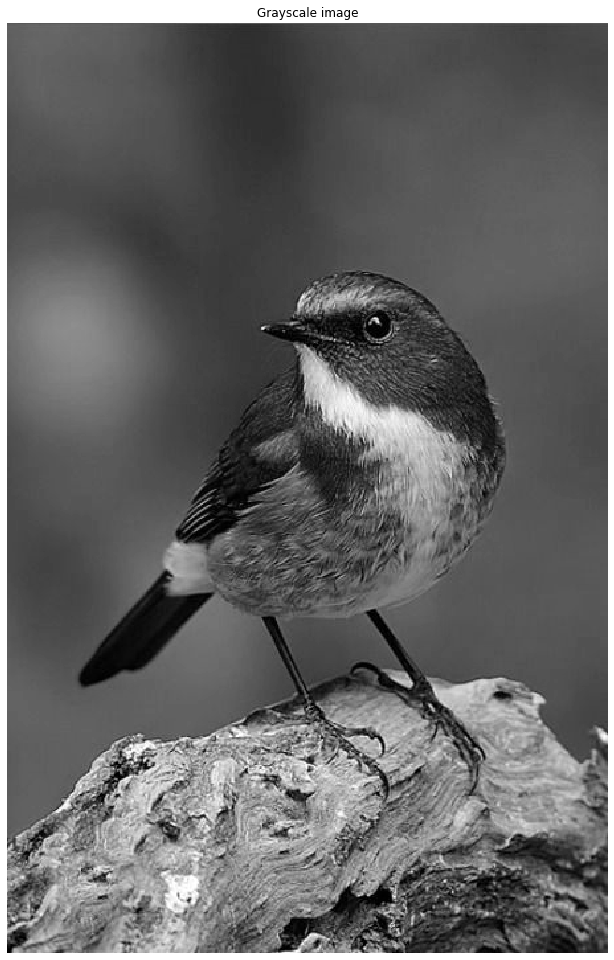

In [17]:
image_gs = imread('bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9,16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

In [18]:
print_image_summary(image_gs, ['G'])


--------------
Image Details:
--------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max=1.0000


In [19]:
X_train_final = x_train.reshape((-1,28,28,1)) / 255.
X_test_final = x_test.reshape((-1,28,28,1)) / 255.

In [25]:
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu',
                           input_shape=(28,28,1)),
                           # 32 : 합성곱 필터 갯수
                           #(3,3) : 커널의 행과 열
                           #padding : 경계처리 same - 출력과 입력 이미지가 같게...
                                            #vaid - 출력이 입력보다 작게
                           # activation : relu 은닉층에서 사용, linear 디폴트, 입력과 가중치가 계산된 값
                           #input_shape 입력 데이터의 형을 정의 첫 계층 에서만 정의
                           
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    # 필터의 크기(2,2), 스트라이드 는 2 (건너뛴는 단위)
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') 
])

model_with_conv.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

In [26]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 71s 37ms/step - loss: 2.3028 - accuracy: 0.0988
Epoch 2/5
1875/1875 [==============================] - 72s 38ms/step - loss: 2.3028 - accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 73s 39ms/step - loss: 2.3028 - accuracy: 0.0989
Epoch 4/5
1875/1875 [==============================] - 72s 38ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 5/5
1875/1875 [==============================] - 72s 38ms/step - loss: 2.3028 - accuracy: 0.0992
313/313 - 3s - loss: 2.3027 - accuracy: 0.1000


[2.3026621341705322, 0.10000000149011612]

In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
model = ResNet50(include_top = True, # 완결연결층을 포함할지 여부
                 weights = "imagenet", # 가중치 None 무작위 초기화 imagenet 사전훈련된 값
                 input_tensor = None, #입력데이터의 텐서 출력
                 input_shape = None, # 입력 이미지에 대한 텐서 크기
                 pooling = None, # none 마지막의 합성곱 층, #avg 마지막 합성 곱층에 평균 플링 추가
                 classes = 1000) # weight로 

# 100만개가 넘는 영상을 이용하여 훈련된 신경망이다.

102973440/102967424 [==============================] - 1s 0us/step


In [31]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [32]:
model.trainable = False
model = Sequential([model,
                    Dense(2, activation = 'sigmoid')])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1000)              25636712  
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 2002      
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


In [33]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

epoch, iterations, batch size

데이터가 클 경우 한번에 학습하지 못해 데이터를 나눠서 학습하게 될 때 등장한다.

사전적의미는 epoch 시대, iteration 반복, batch 집단 이지만......

머신러닝에서는 epoch 은 전체 데이터가 알고리즘에 한번 다 통과하는 것을 의미한다. epoch의 수가 증가할 수록 모델의 정확도가 높아진다. 어느 순간을 지나게 되면 모델이 훈련데이터에 너무 맞춰져서 훈련할 때는 성능이 좋지만 실제 데이터를 적용할 때는 성능이 좋지 않게 되는 overfitting이 발생한다. 마치 같은 문제집을 반복해서 풀면 답을 외워버리는 현상과 비슷하다. batch는 하나의 큰 데이터를 작은 데이터셋으로 나누었을때의 크기를 의미한다. 마치 문제집에서 소단원들로 문제들이 묶여있는 것과 비슷한다.

iteration 은 한번의 전체 데이터를 훈련시키기 위해서 반복되는 batch의 숫자를 의미한다. 이를테면 문제집에서의 소단원의 갯수와 비슷한다.

2000개의 데이터가 있을 때 batch size를 500로 하면 4번이 iteration 되어야 1epoch 가 훈련된다.


In [47]:
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = "train"
valid_dir = "validation"


train = ImageDataGenerator(
                 rescale=1./255,
                 rotation_range=10,
                 width_shift_range=0.1,
                 height_shift_range=0.1,
                 shear_range=0.1,
                 zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical")

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=valid_generator,
                    verbose=2)

Found 385 images belonging to 3 classes.
Found 98 images belonging to 3 classes.
Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')